In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

This star classification dataset was retrieved from Kaggle: 
https://www.kaggle.com/deepu1109/star-dataset

In [2]:
orig_df=pd.read_csv('6_class.csv')
df=orig_df.copy()

In [3]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
df['Star type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [5]:
labels=['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence','Super Giants', 'Hyper Giants']

Our objective is to predict star type (0: Red Dwarf, 1: Brown Dwarf, 2: White Dwarf, 3: Main Sequence, 4: Super Giants, 5: Hyper Giants) based on temperature, luminosity, radius, absolute magnitude, star color, and spectral class.

Red and brown dwarfs are small, old stars which have a very low fusion rate, which means they consume less fuel than most other stars. They are seen on the bottom of the main sequence track but are smaller in size, luminosity, and effective temperature from the rest of the main sequence stars. 

Main sequence stars are also 'dwarfs' because they are still considered to be smaller and fainter than many other stellar objects in the universe. About 90% of the stars in the universe, including the Sun, are considered main sequence stars because this stage is where stars spend most of their lives fusing hydrogen to helium. 

When these main sequence stars are depleted of hydrogen in their cores, they become larger in radius due to the expansion of the outer hydrogen shell surrounding the core as it begins nuclear fusion. Depending on how big their initial stellar masses are, they can become a super giant or a hyper giant which are massive stars which burn through more elements on the periodic table and have a higher effective temperature and luminosity. 

When stars less than 8 times the Sun's mass deplete all of their fuel for nuclear fusion, they become white dwarfs as they collapse onto themselves because they can't create enough thermal energy to counteract the gravitational energy. They then reach a very small radius the size of the Earth to experience electron degeneracy, exhibiting a peculiar property of extreme pressure where an increase in mass results in a decrease in radius. 

If these stars are massive enough, the gravitational collapse bounces back, causing the outer layers of the star to explode. They can either become a neutron star (a very dense star about the size of a city) or black hole after this Type II supernova explosion. A white dwarf can also steal mass from another stellar object to explode into a Type I supernova explosion. 

Here we use this balanced dataset to recreate a model that can predict the star types of unclassified stars based on their properties. If our model is good, we might be able to recreate an image similar to the Hertzsprung-Russell diagram.

![image](https://chandra.harvard.edu/graphics/edu/formal/variable_stars/diagram.jpg)

In [6]:
df.shape

(240, 7)

In [7]:
df.isna().values.any()

False

In [8]:
df.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [9]:
df.drop('Star type',axis=1).describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [10]:
df.groupby('Star type')['Luminosity(L/Lo)'].describe()

,count,mean,std,min,25%,50%,75%,max
Star type,,,,,,,,
0,40.0,0.000693,0.000888,0.000138,0.000315,0.00052,0.000737,0.0056
1,40.0,0.005406,0.007330,0.000190,0.001315,0.00315,0.006675,0.0390
2,40.0,0.002434,0.008912,0.000080,0.000287,0.00076,0.001227,0.0560
3,40.0,32067.386275,69351.195858,0.085000,6.297500,738.50000,12962.500000,204000.0000
4,40.0,301816.250000,175756.378119,112000.000000,197250.000000,242145.00000,344160.000000,813000.0000
5,40.0,309246.525000,199343.999427,74000.000000,173000.000000,266500.00000,365957.500000,849420.0000


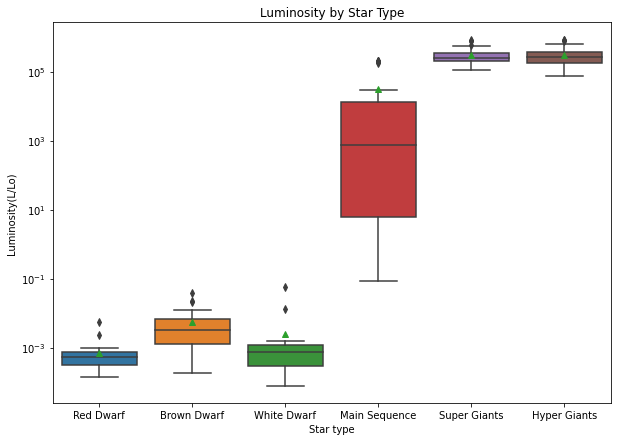

In [11]:
plt.subplots(figsize=(10,7))
lum=sns.boxplot(x='Star type', y='Luminosity(L/Lo)', data=df, showmeans=True)
lum.set(yscale='log')
lum.set_xticklabels(labels)
lum.set_title('Luminosity by Star Type');

Luminosity refers to the amount of energy a blackbody emits per second. Here, luminosity is divided by the average luminosity of the Sun, $L_o = 3.828 \cdot 10^{26}W$. Luminosity should range between 10e-4 and 10e6. 

Luminosity is proportional to the fourth power of temperature (r=0.39) and the second power of stellar radius by the Stefan-Boltzmann Law of a star's luminosity: $L=4 \pi R^2 \sigma T^4$. 

Red dwarfs, brown dwarfs, and white dwarfs have a smaller nuclear fusion rate and therefore emit less energy per second than the other star types. White dwarfs particularly do have a high effective temperature, but its radius is too small for the luminosity to be significant.

In [12]:
df.groupby('Star type')['Absolute magnitude(Mv)'].describe()

,count,mean,std,min,25%,50%,75%,max
Star type,,,,,,,,
0,40.0,17.563500,1.213111,16.05,16.7000,17.145,18.35250,20.060
1,40.0,12.539975,1.422816,10.12,11.3675,12.605,13.56425,14.940
2,40.0,12.582500,1.278386,10.18,11.5950,12.340,13.83000,14.870
3,40.0,-0.367425,3.613592,-4.70,-3.7025,-1.180,2.42500,6.506
4,40.0,-6.369925,0.560051,-7.45,-6.8075,-6.235,-5.96125,-5.240
5,40.0,-9.654250,1.453605,-11.92,-10.8750,-9.915,-8.14750,-7.580


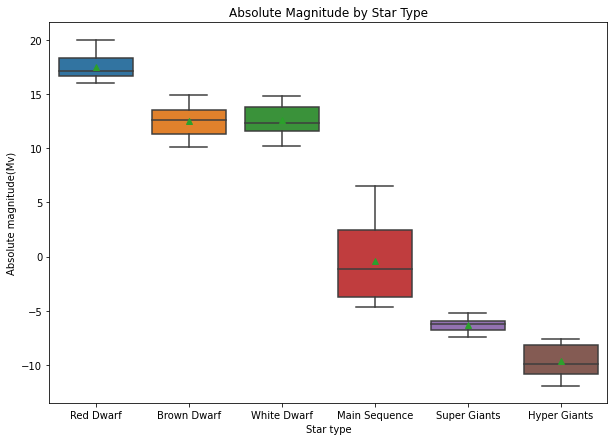

In [13]:
plt.subplots(figsize=(10,7))
am=sns.boxplot(x='Star type', y='Absolute magnitude(Mv)', data=df, showmeans=True)
am.set_xticklabels(labels)
am.set_title('Absolute Magnitude by Star Type');

Absolute magnitude is by convention the magnitude of a star if it were to be located at a distance of 10 parsecs away from us. It typically runs from -20 to +20, with a decrease in value denoting a brighter object. For reference, the sun has an absolute magnitude of +4.83.

The absolute magnitude $M_v$ is given by $M_v=m+5-5 \cdot log_{10}(distance)$ or by its relation to the luminosity of another star (in this case, the sun), $\frac{L_1}{L_2}=2.512^{M_{v,1}-M_{v,2}}$. Absolute magnitude is different from luminosity in that luminosity is independent of distance.

This graph looks similar to the luminosity graph above since they are both measurements of brightness, except for the clear distinction of absolute magnitude between super giants and hyper giants.

In [14]:
df.groupby('Star type')['Radius(R/Ro)'].describe()

,count,mean,std,min,25%,50%,75%,max
Star type,,,,,,,,
0,40.0,0.110015,0.025783,0.0570,0.093150,0.1060,0.120250,0.190
1,40.0,0.348145,0.154453,0.0980,0.240000,0.3380,0.409750,0.730
2,40.0,0.010728,0.001725,0.0084,0.009305,0.0102,0.012025,0.015
3,40.0,4.430300,2.801390,0.7950,1.287500,5.7125,6.367500,10.600
4,40.0,51.150000,27.656826,12.0000,25.750000,43.5000,80.250000,98.000
5,40.0,1366.897500,255.561357,708.9000,1193.000000,1352.5000,1525.000000,1948.500


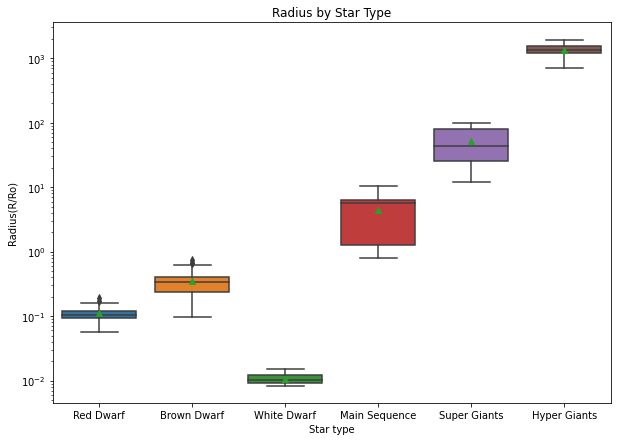

In [15]:
plt.subplots(figsize=(10,7))
ra=sns.boxplot(x='Star type', y='Radius(R/Ro)', data=df, showmeans=True)
ra.set(yscale='log')
ra.set_xticklabels(labels)
ra.set_title('Radius by Star Type');

Radius is divided by the average radius of the sun: $R_o = 6.9551 \cdot 10^8 m$. Radii should range between 10e-4 and 10e6. 

White dwarfs have the smallest average radii as expected, since they are supported by degenerate pressure which allows their radii to decrease if matter increases. Main sequence stars consist of a larger range of radii (about 1 to 10 times the size of the Sun).

In [16]:
df.groupby('Star type')['Temperature (K)'].describe()

,count,mean,std,min,25%,50%,75%,max
Star type,,,,,,,,
0,40.0,2997.950,332.276295,1939.0,2812.75,2935.0,3242.50,3531.0
1,40.0,3283.825,269.637258,2621.0,3132.75,3314.0,3527.50,3692.0
2,40.0,13931.450,4957.655189,7100.0,9488.75,13380.0,17380.00,25000.0
3,40.0,16018.000,10661.234972,4077.0,7479.25,12560.5,23030.00,39000.0
4,40.0,15347.850,10086.784628,3008.0,6899.50,12821.0,23181.25,40000.0
5,40.0,11405.700,11816.991886,3399.0,3603.75,3766.0,18976.00,38940.0


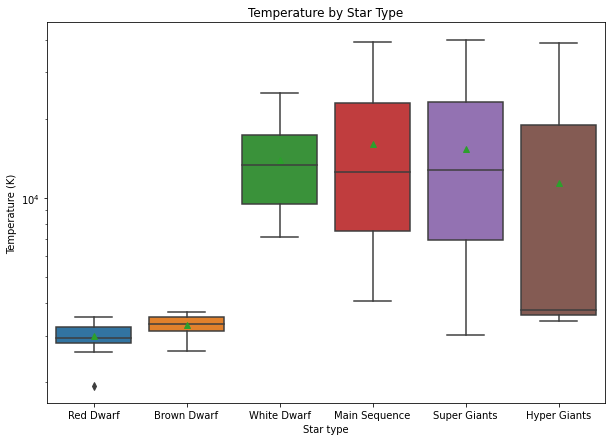

In [17]:
plt.subplots(figsize=(10,7))
temp=sns.boxplot(x='Star type', y='Temperature (K)', data=df, showmeans=True)
temp.set(yscale='log')
temp.set_xticklabels(labels)
temp.set_title('Temperature by Star Type');


Temperature refers to the effective (surface) temperature of a star in Kelvin.

Red and brown dwarfs have the lowest effective temperatures as expected because they are long lived stars that rely on very slow fusion for fuel. Although white dwarfs are remnants of stars that have burnt up all the hydrogen fuel, they radiate heat from the leftover thermal energy from when it was a larger star. They are also smaller, so energy is transported from the core of the star to the surface much easily than bigger stars. 

Similarly, hyper giants may have a high core temperature, but may not effective in transporting this thermal energy depending on the adiabatic temperature gradient (https://websites.pmc.ucsc.edu/~glatz/astr_112/lectures/notes12.pdf).

In [18]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Spectral class is classified under the Morgan-Keenan (MK) system from hottest to coolest: O, B, A, F, G, K, and M. Wien's displacement law gives the relation between effective temperature and wavelength (related to spectral class): $\lambda_{max}=\frac{b}{T}$.

In [19]:
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
white                   3
Blue white              3
yellowish               2
Orange                  2
Whitish                 2
Blue                    1
Blue white              1
Blue-White              1
Orange-Red              1
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Name: Star color, dtype: int64

We replace the star colors with more consistent values, but this column may not be necessary if we know the spectral class of a star.

In [20]:
color_dict={'Blue White':'Blue-white', 'Blue white':'Blue-white', 'Blue white ':'Blue-white', 'Blue-White':'Blue-white', \
            'yellow-white':'Yellow-white', 'Yellowish White':'Yellow-white', 'yellowish':'Yellow', 'White-Yellow':'Yellow-white', 'Yellowish':'Yellow',\
            'white':'White', 'Whitish':'White', 'Blue ':'Blue'}

df['Star color'].replace(color_dict, inplace=True)
df['Star color'].value_counts()

Red                   112
Blue                   56
Blue-white             41
White                  12
Yellow-white           12
Yellow                  3
Orange                  2
Orange-Red              1
Pale yellow orange      1
Name: Star color, dtype: int64

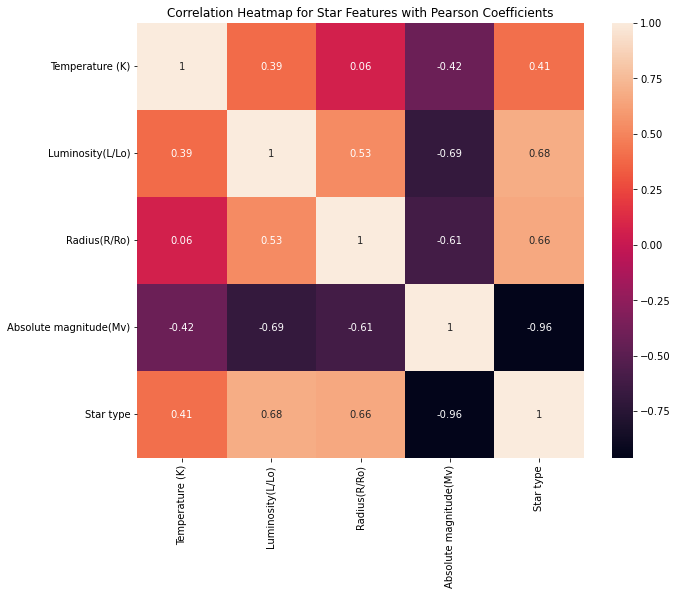

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(round(df.corr(), 2), annot=True)
ax.set_title('Correlation Heatmap for Star Features with Pearson Coefficients');


Absolute magnitude and luminosity are two different measures of brightness and are negatively correlated, as a negative absolute magnitude value corresponds to a higher brightness (r=-0.69). Absolute magnitude and radius is also negatively correlated (r=-0.61). Luminosity, temperature, and radius are bound together by the Stefan-Boltzmann equation as stated above, resulting in a positive correlation (r=0.53) between luminosity and radius, and a slightly lower positive correlation (r=0.39) between luminosity and temperature. 

![image](https://enigmar.net/wp-content/uploads/2021/03/Hertzsprung-Russel-Diagram.jpg)

The Hertzsprung-Russell diagram will often contain a scatter plot of stars, with the absolute magnitude or luminosity on the y-axis, and the spectral type or surface temperature on the x-axis. We attempt to recreate the above plot below: 

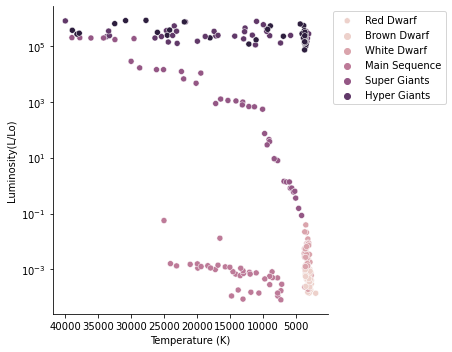

In [22]:
splot=sns.relplot(x='Temperature (K)', y='Luminosity(L/Lo)', hue='Star type', data=df)
splot.set(yscale='log')
splot._legend.remove()
plt.xlim(reversed(plt.xlim()))
plt.legend(labels=['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence','Super Giants', 'Hyper Giants'], bbox_to_anchor=(1, 1));